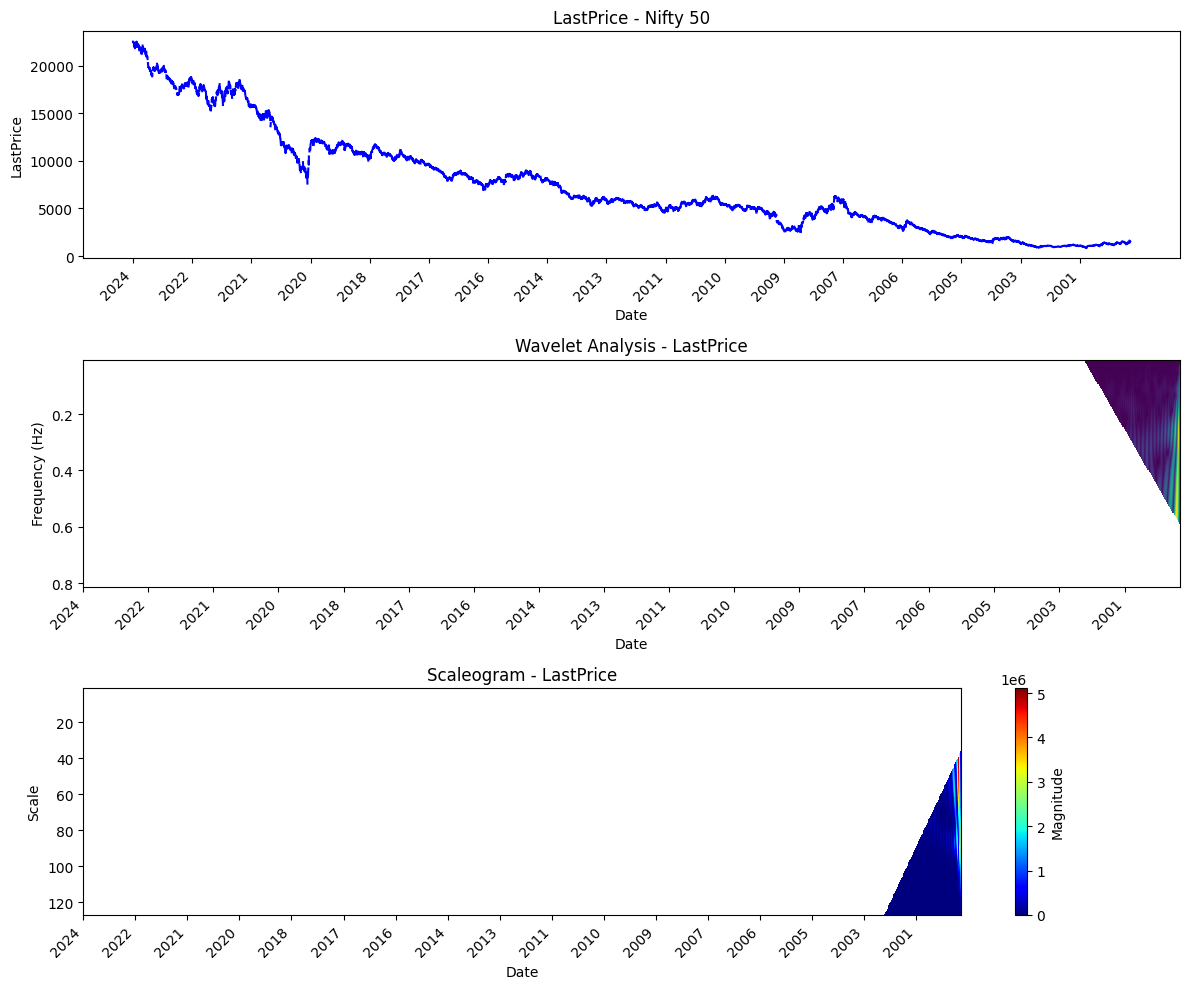

Shape of coeffs: (127, 8426)
Shape of freqs: (127,)


In [22]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read Excel data into a DataFrame
file_path = 'nifty50.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # Assuming data is in the first sheet

# Step 2: Specify the wavelet function
wavelet = 'morl'  # Use the Morlet wavelet

# Step 3: Extract data for the entire dataset
last_price_values = df['LastPrice'].tolist()
years = pd.to_datetime(df['Date']).dt.year.tolist()

# Determine the length of the dataset
data_length = len(last_price_values)

# Determine the range of scales based on the length of the dataset
max_scale = min(128, data_length)  # Limit the maximum scale to avoid exceeding the length of the dataset
scales = np.arange(1, max_scale)

# Perform wavelet analysis
coeffs, freqs = pywt.cwt(last_price_values, scales=scales, wavelet=wavelet)

# Create common x-values for plotting
x_values = np.arange(data_length)

# Plot the wavelet analysis results
plt.figure(figsize=(12, 10))

# Plot the original LastPrice with years on the x-axis
plt.subplot(3, 1, 1)
plt.plot(x_values, last_price_values, color='blue')
plt.title('LastPrice - Nifty 50')
plt.xlabel('Date')
plt.ylabel('LastPrice')
plt.xticks(np.arange(0, len(x_values), 500), [years[idx] for idx in range(0, len(x_values), 500)], rotation=45, ha='right')  # Show every 500th year for better visibility

# Plot the wavelet coefficients
plt.subplot(3, 1, 2)
plt.imshow(np.abs(coeffs), aspect='auto', extent=[0, data_length, freqs[0], freqs[-1]], cmap='viridis', interpolation='bilinear')
plt.title('Wavelet Analysis - LastPrice')
plt.xlabel('Date')
plt.ylabel('Frequency (Hz)')
plt.xticks(np.arange(0, len(x_values), 500), [years[idx] for idx in range(0, len(x_values), 500)], rotation=45, ha='right')  # Show every 500th year for better visibility

# Plot the scaleogram
plt.subplot(3, 1, 3)
plt.imshow(abs(coeffs)**2, aspect='auto', origin='lower', 
           extent=[0, data_length, scales[-1], scales[0]], cmap='jet') 
plt.title('Scaleogram - LastPrice')
plt.xlabel('Date')
plt.ylabel('Scale')
plt.xticks(np.arange(0, len(x_values), 500), [years[idx] for idx in range(0, len(x_values), 500)], rotation=45, ha='right')
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()

# Perform wavelet analysis
coeffs, freqs = pywt.cwt(last_price_values, scales=scales, wavelet=wavelet)
print("Shape of coeffs:", coeffs.shape)  # Debugging
print("Shape of freqs:", freqs.shape)  # Debugging

